In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm # Linear regression scenario
from scipy import stats
import scipy.stats as stats
import statsmodels.formula.api as smf # OLS
from scipy.stats import chi2_contingency 
import pingouin as pg

E:\installation\Anaconda\lib\site-packages\xarray\core\merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
#import data
df = pd.read_excel("D:\\teaching\\New Media Analysis and User Experience\\survey\\inm.xlsx")

# 数据清洗

In [3]:
def gender(series):
    if series == 1:
        return '男性'
    else:
        return '女性'

def hukou(series):
    if series == 1:
        return '城镇'
    else:
        return '非城镇'

def location (series):
    if series == 1:
        return "非广东地区"
    elif series == 2:
        return "珠三角地区"
    elif series == 3:
        return "粤东"
    elif series == 4:
        return "粤西"
    else:
        return "粤北"

def like(series):
    if series == 1:
        return '喜欢'
    else:
        return '不喜欢'

def impr(series):
    if series == 1:
        return '有提升空间'
    else:
        return '挺好的'


In [4]:
df.gender = df.gender.apply(gender).astype('category')
# df.gender.value_counts()

df.hukou = df.hukou.apply(hukou).astype('category')
# df.hukou.value_counts()

df.location = df.location.apply(location).astype('category')
# df.location.value_counts()

In [5]:
for i in range(len(df.columns)):
    print(i,df.columns[i])

0 method
1 l_code
2 l_design
3 l_operation
4 l_production
5 l_copywriter
6 l_market
7 l_other
8 l_non
9 maj_work
10 maj_dir
11 cap_code
12 cap_design
13 cap_operation
14 cap_production
15 cap_copywriter
16 cap_market
17 ranking
18 effort_read
19 effort_info
20 effort_res
21 effort_project
22 effort_overall
23 sati_code
24 sati_design
25 sati_operation
26 sati_production
27 sati_copywriter
28 sati_market
29 sati_other
30 impr_code
31 impr_design
32 impr_operation
33 impr_production
34 impr_copywriter
35 impr_market
36 impr_other
37 sati_overall
38 grade
39 gender
40 spending
41 high_school_major
42 location
43 hukou


In [6]:
for i in range(1,9):
    df.iloc[:,i] = df.iloc[:,i].apply(like).astype('category')

In [7]:
df.filter(regex = "^l_.*")

,l_code,l_design,l_operation,l_production,l_copywriter,l_market,l_other,l_non
0,不喜欢,喜欢,喜欢,喜欢,喜欢,不喜欢,不喜欢,不喜欢
1,喜欢,不喜欢,喜欢,喜欢,不喜欢,不喜欢,不喜欢,不喜欢
2,不喜欢,喜欢,喜欢,喜欢,喜欢,不喜欢,不喜欢,不喜欢
3,不喜欢,不喜欢,喜欢,喜欢,喜欢,不喜欢,不喜欢,不喜欢
4,不喜欢,喜欢,不喜欢,不喜欢,不喜欢,不喜欢,不喜欢,不喜欢
...,...,...,...,...,...,...,...,...
75,喜欢,不喜欢,不喜欢,喜欢,不喜欢,不喜欢,不喜欢,不喜欢
76,不喜欢,不喜欢,喜欢,喜欢,不喜欢,不喜欢,不喜欢,不喜欢
77,喜欢,喜欢,喜欢,喜欢,不喜欢,不喜欢,不喜欢,不喜欢
78,不喜欢,喜欢,喜欢,喜欢,喜欢,喜欢,不喜欢,不喜欢


In [8]:
for i in range(30,37):
    df.iloc[:,i] = df.iloc[:,i].apply(impr).astype('category')

In [9]:
df.filter(regex = "^impr_.*")

,impr_code,impr_design,impr_operation,impr_production,impr_copywriter,impr_market,impr_other
0,挺好的,有提升空间,有提升空间,有提升空间,有提升空间,有提升空间,挺好的
1,有提升空间,有提升空间,挺好的,挺好的,有提升空间,有提升空间,挺好的
2,挺好的,有提升空间,有提升空间,有提升空间,有提升空间,挺好的,挺好的
3,挺好的,挺好的,有提升空间,有提升空间,有提升空间,挺好的,挺好的
4,挺好的,有提升空间,挺好的,挺好的,有提升空间,挺好的,挺好的
...,...,...,...,...,...,...,...
75,有提升空间,挺好的,挺好的,有提升空间,挺好的,有提升空间,挺好的
76,挺好的,有提升空间,有提升空间,挺好的,挺好的,有提升空间,挺好的
77,有提升空间,挺好的,有提升空间,有提升空间,挺好的,有提升空间,挺好的
78,挺好的,有提升空间,挺好的,挺好的,挺好的,有提升空间,挺好的


# 数据分析

## ✨探索数据（描述性统计）

In [10]:

# dt.head(5)

# dt.describe()

df["effort_overall"].describe()


count    80.000000
mean      3.175000
std       0.707554
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: effort_overall, dtype: float64

## 🎉推断性统计

### t检验

均值比较

In [55]:
df.groupby('hukou').ranking.mean()

hukou
城镇     3.40
非城镇    2.92
Name: ranking, dtype: float64

In [58]:
t2, p2 = stats.ttest_ind(df.hukou,df.ranking)
print("t = " + str(t2))
print("p = " + str(p2))

t = -17.882773758679836
p = 8.350312923730313e-40


### 方差分析

**不同生源地专业满意度关系分析**

均值比较

In [19]:
df.groupby('location').sati_overall.mean()

location
珠三角地区    3.450000
粤东       3.529412
粤北       3.166667
粤西       3.300000
非广东地区    3.285714
Name: sati_overall, dtype: float64

In [22]:
# 方差分析
stats.f_oneway(df['sati_overall'][df['location'] == "非广东地区"],
               df['sati_overall'][df['location'] == "珠三角地区"],
               df['sati_overall'][df['location'] == "粤东"],
               df['sati_overall'][df['location'] == "粤北"],
               df['sati_overall'][df['location'] == "粤西"])             

F_onewayResult(statistic=0.2510353261441901, pvalue=0.9081728336202827)

**pingouin实现** 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 

参考：
- [One-way ANOVA using a pandas DataFrame](https://pingouin-stats.org/index.html#one-way-anova-using-a-pandas-dataframe)
- [Post-hoc tests corrected for multiple-comparisons](https://pingouin-stats.org/index.html#post-hoc-tests-corrected-for-multiple-comparisons)

In [32]:
aov = pg.anova(data=df, dv='sati_overall', between='location', detailed=True)
print(aov)

     Source         SS  DF        MS         F     p-unc       np2
0  location   0.890301   4  0.222575  0.251035  0.908173  0.013212
1    Within  66.497199  75  0.886629       NaN       NaN       NaN


事后检验（可类比SPSS中的LSD）

In [36]:
# FDR-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_ttests(data=df, dv='sati_overall', within='location')

# Pretty printing of table
pg.print_table(posthoc, floatfmt='.3f')


POST HOC TESTS

Contrast    A           B           Paired    Parametric         T     dof  Tail         p-unc    BF10    hedges
----------  ----------  ----------  --------  ------------  ------  ------  ---------  -------  ------  --------
location    粤西        珠三角地区  True      True          -0.372  13.030  two-sided    0.716   0.354    -0.137
location    粤西        粤东        True      True          -0.592  11.122  two-sided    0.565   0.417    -0.275
location    粤西        非广东地区  True      True           0.035  12.892  two-sided    0.973   0.424     0.014
location    粤西        粤北        True      True           0.245  12.133  two-sided    0.810   0.445     0.115
location    珠三角地区  粤东        True      True          -0.380  53.886  two-sided    0.706   0.305    -0.084
location    珠三角地区  非广东地区  True      True           0.659  18.126  two-sided    0.518   0.437     0.161
location    珠三角地区  粤北        True      True           0.651   6.872  two-sided    0.536   0.454     0.265
location    

E:\installation\Anaconda\lib\site-packages\pingouin\parametric.py:198: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to "
E:\installation\Anaconda\lib\site-packages\pingouin\effsize.py:689: UserWarning: x and y have unequal sizes. Switching to paired == False.
  warnings.warn("x and y have unequal sizes. Switching to "


### 卡方检验

In [43]:
# # 显示频数
# bygender = dt.groupby("gender").l_code.value_counts()
# bygender

# # 显示比例
# bygender_prop = dt.groupby("gender").l_code.value_counts(normalize=True)
# bygender_prop

# 交叉表
crosstab = pd.crosstab(df.gender,df.l_code)
crosstab

# 卡方检验
stat, p, dof, expected = chi2_contingency(crosstab) 
p

# 可视化
# heatmap(
#     x = crosstab.gender,
#     y = crosstab.l_code
# )

0.14999215328710366

**pingouin实现** 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 

参考：
- [pingouin.chi2_independence](https://pingouin-stats.org/generated/pingouin.chi2_independence.html?highlight=chi%20square)

In [49]:
expected, observed, stats = pg.chi2_independence(df, x='gender',y='l_code') #提示样本量过小，不适合用该方法

E:\installation\Anaconda\lib\site-packages\pingouin\contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))


In [ ]:
expected

In [ ]:
observed

In [ ]:
stats

### 相关分析

In [44]:
# 努力方式与排名的相关关系
df[["effort_overall","ranking"]].corr()

,effort_overall,ranking
effort_overall,1.00000,0.28433
ranking,0.28433,1.00000


In [10]:
df[["cap_code", "effort_read","effort_info","effort_res","effort_project","effort_overall"]].corr()

,cap_code,effort_read,effort_info,effort_res,effort_project,effort_overall
cap_code,1.000000,0.266025,0.351830,0.302304,0.301271,0.167033
effort_read,0.266025,1.000000,0.467344,0.418508,0.247580,0.239919
effort_info,0.351830,0.467344,1.000000,0.642064,0.468721,0.252594
effort_res,0.302304,0.418508,0.642064,1.000000,0.372938,0.324249
effort_project,0.301271,0.247580,0.468721,0.372938,1.000000,0.327957
effort_overall,0.167033,0.239919,0.252594,0.324249,0.327957,1.000000


**pingouin实现** 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧 🐧

参考：[pingouin.anova](https://pingouin-stats.org/generated/pingouin.anova.html#pingouin.anova)

In [28]:
pg.pairwise_corr(df, columns=["effort_overall","ranking"], method='pearson')

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,effort_overall,ranking,pearson,two-sided,80,0.28433,"[0.07, 0.47]",0.080844,0.05697,0.292387,0.010585,3.454,0.732312


In [27]:
df[["cap_code", "effort_read","effort_info","effort_res","effort_project","effort_overall"]].rcorr()

,cap_code,effort_read,effort_info,effort_res,effort_project,effort_overall
cap_code,-,*,**,**,**,
effort_read,0.266,-,***,***,*,*
effort_info,0.352,0.467,-,***,***,*
effort_res,0.302,0.419,0.642,-,***,**
effort_project,0.301,0.248,0.469,0.373,-,**
effort_overall,0.167,0.24,0.253,0.324,0.328,-


### 回归分析

In [43]:
model = smf.ols("ranking ~ maj_work + maj_dir + effort_overall",
        data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ranking   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     5.197
Date:                Fri, 13 Nov 2020   Prob (F-statistic):            0.00256
Time:                        01:53:20   Log-Likelihood:                -92.492
No. Observations:                  80   AIC:                             193.0
Df Residuals:                      76   BIC:                             202.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.7129      0.536      3.195      0.002       0.645       2.781
maj_work          -0.0797      0.098     -0.814      0.418      -0.275       0.115
maj_dir            0.2179      0.079      2.751      0.007       0.060       0.376
effort_overall     0.3679      0.127      2.888      0.005       0.114       0.622
==============================================================================
Omnibus:                        0.771   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.680   Jarque-Bera (JB):                0.326
Skew:                          -0.107   Prob(JB):                        0.850
Kurtosis:                       3.228   Cond. No.                         34.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**自变量带定性数据**

In [17]:
model = smf.ols("ranking ~ maj_work + gender + location",
        data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ranking   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.526
Date:                Sun, 08 Nov 2020   Prob (F-statistic):              0.182
Time:                        18:22:03   Log-Likelihood:                -95.229
No. Observations:                  80   AIC:                             204.5
Df Residuals:                      73   BIC:                             221.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.5789      0.360      9.930      0.000       2.861       4.297
gender[T.男性]         -0.1266      0.237     -0.533      0.596      -0.600       0.347
location[T.粤东]       -0.2032      0.246     -0.827      0.411      -0.693       0.286
location[T.粤北]       -0.9553      0.365     -2.619      0.011      -1.682      -0.228
location[T.粤西]       -0.2594      0.296     -0.877      0.383      -0.849       0.330
location[T.非广东地区]    -0.5658      0.346     -1.637      0.106      -1.255       0.123
maj_work             -0.0324      0.104     -0.311      0.757      -0.240       0.175
==============================================================================
Omnibus:                        0.187   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.296
Skew:                          -0.107   Prob(JB):                        0.862
Kurtosis:                       2.793   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**因变量带定性数据（Logistics回归）**

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [70]:
model = smf.glm("l_code ~ cap_code + gender",data = df, family=sm.families.Binomial()).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Generalized Linear Model Regression Results                       
=========================================================================================
Dep. Variable:     ['l_code[不喜欢]', 'l_code[喜欢]']   No. Observations:                   80
Model:                                       GLM   Df Residuals:                       77
Model Family:                           Binomial   Df Model:                            2
Link Function:                             logit   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:                -29.695
Date:                           Sun, 08 Nov 2020   Deviance:                       59.390
Time:                                   21:12:19   Pearson chi2:                     85.2
No. Iterations:                                5                                         
Covariance Type:                       nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.2835      1.012      4.233      0.000       2.300       6.267
gender[T.男性]    -0.9902      0.724     -1.367      0.172      -2.410       0.430
cap_code        -1.0610      0.383     -2.767      0.006      -1.813      -0.309
================================================================================
"""

### 信度分析

参考：[pingouin.cronbach_alpha](https://pingouin-stats.org/generated/pingouin.cronbach_alpha.html#pingouin.cronbach_alpha)

In [40]:
df_effort = df.filter(regex = "^effort_.*")

In [42]:
pg.cronbach_alpha(data=df_effort) #返回Cronbach's α值及其置信区间

(0.753786045633211, array([0.657, 0.83 ]))

### 因子分析

参考：
- [Introduction to Factor Analysis in Python](https://www.datacamp.com/community/tutorials/introduction-factor-analysis)
- [factor_analyzer官方文档](https://factor-analyzer.readthedocs.io/en/latest/index.html#)
- [Factor Analysis with Python — DataSklr](https://www.datasklr.com/principal-component-analysis-and-factor-analysis/factor-analysis)

In [11]:
from factor_analyzer import FactorAnalyzer

In [12]:
df_cap = df.filter(regex = "^cap_.*")

**Bartlett’s test** 

In [13]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_cap)
chi_square_value, p_value

(124.25775942800482, 1.2618724602602526e-19)

**Kaiser-Meyer-Olkin (KMO) Test**

In [14]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_cap)

In [15]:
kmo_model

0.7493491610482844

**Performing Factor Analysis**

In [16]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors =2,rotation="varimax")
fa.fit(df_cap)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [26]:
# 公因子方差（表示各变量所含原有信息能被提取的公因子所表示的程度）
fa.get_factor_variance()

(array([2.04801593, 0.67376126]),
 array([0.34133599, 0.11229354]),
 array([0.34133599, 0.45362953]))

In [30]:
ev,v = fa.get_eigenvalues() #特征根（用特征根大于1作为标准）
ev

array([2.67703062, 1.07496494, 0.93707687, 0.52586204, 0.46526927,
       0.31979627])

In [18]:
fa.loadings_
loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2'])
print('Factor Loadings \n%s' %loadings) #因子载荷

Factor Loadings 
   Factor 1  Factor 2
0  0.227602  0.112829
1  0.029556  0.575814
2  0.686857  0.065328
3  0.840050  0.039097
4  0.493939  0.514895
5  0.757567  0.241983


In [28]:
"""
变量共同度（变量能被因子解释的程度，取值范围：0~1 ；
取值越大，说明变量能被因子解释的信息比例越大
"""
fa.get_communalities() 

array([0.06453306, 0.33243519, 0.47604044, 0.70721232, 0.509093  ,
       0.63246318])

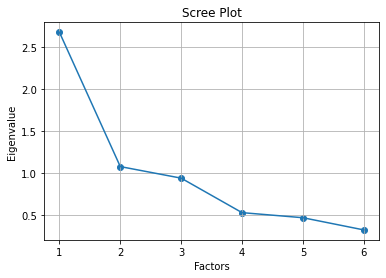

In [26]:
# SCREEPLOT (need pyplot)
plt.scatter(range(1,df_cap.shape[1]+1),ev)
plt.plot(range(1,df_cap.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()